<a href="https://colab.research.google.com/github/maufonseca18/Challenge_TelecomX_alura/blob/main/Challenge_telecom_x_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import de los datos para el df

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
datos = pd.read_json('/content/drive/MyDrive/Proyecto telecom X Alura /TelecomX_Data.json')

In [3]:
datos.shape

(7267, 6)

In [4]:
datos.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

#Comprobación de incoherencias y arreglo

In [5]:
columnas_dict = ['customer', 'phone', 'internet', 'account'] #Se expanden las columnas a diccionario
for col in columnas_dict:
    if col in datos.columns:
        expandido = pd.json_normalize(datos[col])
        expandido = expandido.add_prefix(f"{col}_")
        datos = pd.concat([datos.drop(columns=[col]), expandido], axis=1)

print("\nValores nulos iniciales por columna:") #Revisión inicial de nulos
print(datos.isnull().sum())


Valores nulos iniciales por columna:
customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total        0
dtype: int64


In [6]:
columnas_objeto = datos.select_dtypes(include='object').columns #Se ajustan espacios
for col in columnas_objeto:
    datos[col] = datos[col].astype(str).str.strip().str.title()

datos['Churn'] = datos['Churn'].astype(str).str.strip() #Problema 'Churn..'#mapeo a binario
for col in columnas_objeto:
    datos[col] = datos[col].astype(str).str.strip().str.title()

datos['account_Charges.Total'] = pd.to_numeric(datos['account_Charges.Total'], errors='coerce')

In [7]:
datos['Churn']
#Este es el cuarto intento para procesar los datos de la columna 'Churn' a binario
#Todos los demás intentos daban error y eliminaba o convertia a NaN los datos
#Trabajarlo por solitario resulve el problema....
#Es la cuarta vez que comienzo todo el code desde cero....

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


In [8]:
datos.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-Orfbo,No,Female,0,Yes,Yes,9,Yes,No,Dsl,...,Yes,No,Yes,Yes,No,One Year,Yes,Mailed Check,65.6,593.30
1,0003-Mknfe,No,Male,0,No,No,9,Yes,Yes,Dsl,...,No,No,No,No,Yes,Month-To-Month,No,Mailed Check,59.9,542.40
2,0004-Tlhlj,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,...,No,Yes,No,No,No,Month-To-Month,Yes,Electronic Check,73.9,280.85
3,0011-Igkff,Yes,Male,1,Yes,No,13,Yes,No,Fiber Optic,...,Yes,Yes,No,Yes,Yes,Month-To-Month,Yes,Electronic Check,98.0,1237.85
4,0013-Exchz,Yes,Female,1,Yes,No,3,Yes,No,Fiber Optic,...,No,No,Yes,Yes,No,Month-To-Month,Yes,Mailed Check,83.9,267.40


Estandarización y Tranformación de datos

In [9]:
#Columna Cuentas Díarias
datos['Cuentas_Diarias'] = datos['account_Charges.Monthly'] / 30

#Columnas binarias Y/N - 1/0
cols_yes_no = [
    'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling','Churn'
]

map_binario = {'yes': 1, 'no': 0}

for col in cols_yes_no:
  if col in datos.columns:
    datos[col] = datos[col].astype(str).str.strip().str.lower()
    datos[col] = datos[col].replace(['no internet service', 'no phone service'], 'no')
    datos[col] = datos[col].map(map_binario).fillna(0).astype(int)

#Verificación:
print("\nValores nulos finales por columna:")
print(datos.isnull().sum())
print("\nTipos de datos finales:")
print(datos.dtypes)
print("\nValores únicos de Churn:", datos['Churn'].unique())
print("Dimensiones finales del dataframe:", datos.shape)


Valores nulos finales por columna:
customerID                    0
Churn                         0
customer_gender               0
customer_SeniorCitizen        0
customer_Partner              0
customer_Dependents           0
customer_tenure               0
phone_PhoneService            0
phone_MultipleLines           0
internet_InternetService      0
internet_OnlineSecurity       0
internet_OnlineBackup         0
internet_DeviceProtection     0
internet_TechSupport          0
internet_StreamingTV          0
internet_StreamingMovies      0
account_Contract              0
account_PaperlessBilling      0
account_PaymentMethod         0
account_Charges.Monthly       0
account_Charges.Total        11
Cuentas_Diarias               0
dtype: int64

Tipos de datos finales:
customerID                    object
Churn                          int64
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner               int64
customer_Dependents            int64


In [10]:
# Filtrar filas con valores nulos en 'account_Charges.Total'
nulos_charges_total = datos[datos['account_Charges.Total'].isnull()]

# Mostrar cuántos son y las filas afectadas
print(f"Total de valores nulos en 'account_Charges.Total': {len(nulos_charges_total)}")
display(nulos_charges_total)

Total de valores nulos en 'account_Charges.Total': 11


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Cuentas_Diarias
975,1371-Dwpaz,0,Female,0,1,1,0,0,0,Dsl,...,1,1,1,0,Two Year,0,Credit Card (Automatic),56.05,NaN,1.868333
1775,2520-Sgtta,0,Female,0,1,1,0,1,0,No,...,0,0,0,0,Two Year,0,Mailed Check,20.00,NaN,0.666667
1955,2775-Sefee,0,Male,0,0,1,0,1,1,Dsl,...,0,1,0,0,Two Year,1,Bank Transfer (Automatic),61.90,NaN,2.063333
2075,2923-Arzlg,0,Male,0,1,1,0,1,0,No,...,0,0,0,0,One Year,1,Mailed Check,19.70,NaN,0.656667
2232,3115-Czmzd,0,Male,0,0,1,0,1,0,No,...,0,0,0,0,Two Year,0,Mailed Check,20.25,NaN,0.675000
2308,3213-Vvolg,0,Male,0,1,1,0,1,1,No,...,0,0,0,0,Two Year,0,Mailed Check,25.35,NaN,0.845000
2930,4075-Wkniu,0,Female,0,1,1,0,1,1,Dsl,...,1,1,1,0,Two Year,0,Mailed Check,73.35,NaN,2.445000
3134,4367-Nuyao,0,Male,0,1,1,0,1,1,No,...,0,0,0,0,Two Year,0,Mailed Check,25.75,NaN,0.858333
3203,4472-Lvygi,0,Female,0,1,1,0,0,0,Dsl,...,1,1,1,0,Two Year,1,Bank Transfer (Automatic),52.55,NaN,1.751667
4169,5709-Lvoeq,0,Female,0,1,1,0,1,0,Dsl,...,1,0,1,1,Two Year,0,Mailed Check,80.85,NaN,2.695000


In [11]:
#Cambio de los valores NaN de 'account_Charges.Total' a 0
datos.loc[
    (datos['customer_tenure'] == 0) & (datos['account_Charges.Total'].isna()),
    'account_Charges.Total'
] = 0 #Si la tendencia del cliente es 0 los datos en 'account_Charges.Total' es 0

In [12]:
print(datos.isnull().sum()) #resulto ;)

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total        0
Cuentas_Diarias              0
dtype: int64


#Análisis Descriptivo

In [13]:
#Resumen General
print('Resumen general de variables numéricas:')
print(datos.describe())

#Mediana
print('\nMediana de variables numéricas:')
print(datos.median(numeric_only=True))

#Churn
print("\nDistribución de Churn (clientes que se dieron de baja vs activos):")
print(datos['Churn'].value_counts(normalize=True) * 100)

#Medidas adicionales de interés
print("\nMedia de cargos mensuales y totales:")
print(f"Promedio mensual: {datos['account_Charges.Monthly'].mean():.2f}")
print(f"Promedio total: {datos['account_Charges.Total'].mean():.2f}")

#Relación básica entre tenure y churn (tiempo vs bajas)
print("\nTenure promedio por estado de Churn:")
print(datos.groupby('Churn')['customer_tenure'].mean())

#Identificación de columnas categóricas y su cardinalidad
print("\nCardinalidad de columnas categóricas:")
for col in datos.select_dtypes(include='object').columns:
    print(f"{col}: {datos[col].nunique()} valores únicos")

Resumen general de variables numéricas:
             Churn  customer_SeniorCitizen  customer_Partner  \
count  7267.000000             7267.000000       7267.000000   
mean      0.257190                0.162653          0.484106   
std       0.437115                0.369074          0.499782   
min       0.000000                0.000000          0.000000   
25%       0.000000                0.000000          0.000000   
50%       0.000000                0.000000          0.000000   
75%       1.000000                0.000000          1.000000   
max       1.000000                1.000000          1.000000   

       customer_Dependents  customer_tenure  phone_PhoneService  \
count          7267.000000      7267.000000         7267.000000   
mean              0.300124        32.346498            0.902711   
std               0.458343        24.571773            0.296371   
min               0.000000         0.000000            0.000000   
25%               0.000000         9.000000     

#Distribución de evasión

In [14]:
#Conteo de valores únicos en Churn
print('Conteo de valores únicos en Churn:')
print(datos['Churn'].value_counts())

#Porcentaje de cada cada categoría
print('\nPoncentaje de cada categoría en "Churn":')
print(datos["Churn"].value_counts(normalize=True) * 100)

Conteo de valores únicos en Churn:
Churn
0    5398
1    1869
Name: count, dtype: int64

Poncentaje de cada categoría en "Churn":
Churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64


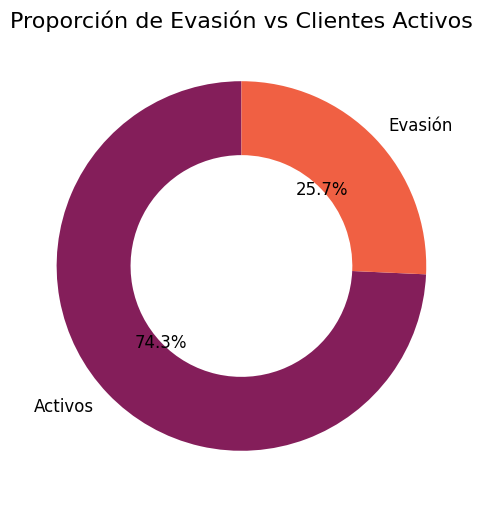

In [15]:
churn_counts = datos['Churn'].value_counts() #conteo

#Colores
colors = sns.color_palette('rocket', 2)

#Gráfico de dona
plt.figure(figsize=(6,6))
plt.pie(
    churn_counts,
    labels=['Activos', 'Evasión'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize':12, 'color':'black'},
    wedgeprops=dict(width=0.4)  # Esto hace que se vea como dona
)
plt.title('Proporción de Evasión vs Clientes Activos', fontsize=16)
plt.show()


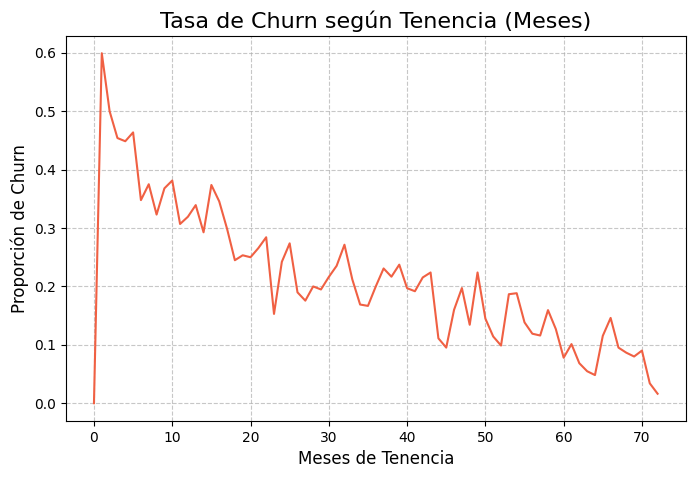

In [16]:
# Calcular proporción de churn por tenure
churn_por_tenure = datos.groupby('customer_tenure')['Churn'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(
    data=churn_por_tenure,
    x='customer_tenure',
    y='Churn',
    color=sns.color_palette('rocket', 2)[1]
)

# Personalización
plt.title('Tasa de Churn según Tenencia (Meses)', fontsize=16)
plt.xlabel('Meses de Tenencia', fontsize=12)
plt.ylabel('Proporción de Churn', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

#Recuento de evasión por variables categóricas

In [17]:
#Género
fig = px.histogram(
    datos,
    x = 'customer_gender',
    color = 'Churn', barmode = 'group',
    title = 'Distribución de Evasión por Género',
    labels = {'Género del cliente': 'customer_gender', 'Evasión': 'Churn'},
    color_discrete_map = {'Activo': 'green', 'Evasión': 'red'}
)
fig.update_layout(
    xaxis_title = 'Género del cliente',
    yaxis_title = 'Cantidad de Clientes',
    legend_title = 'Estado de Evasión por Género'
)
fig.show()

In [18]:
datos['Churn']

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0
